### Solution

In [173]:
#Standard Libaries
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

In [198]:
#Standard monster slaying simulations
def gem_finder(iterations=1000):
    counter = np.zeros([iterations,3]) #Array of gem counts (rare,uncommon,common)
    for i in range (0,iterations):
        c,u,r, = 0,0,0 #Set counts to 0
        while (c<1 or u<1 or r<1): #While not all gems have been found
            y =  random.randrange(0,6,1) #Randomly generate a number between 0 and 5
            if y == 0: r += 1 #Values of 0 = Rare
            elif y<=2: u += 1 #Values of 1-2 = Uncommon
            else: c+=1        #Values of 3-5 = Common
        #Set counters in array
        counter[i,0] = r
        counter[i,1] = u
        counter[i,2] = c
    #Return counter array
    return counter

In [209]:
#Run simulation 10,000,000 times
counter = gem_finder(10000000)
print "Rare Gems Found    :  " + str(np.mean(counter[:,0]))
print "Uncommon Gems Found:  " + str(np.mean(counter[:,1]))
print "Commong Gems Found :  " + str(np.mean(counter[:,2]))

Rare Gems Found    :  1.2164108
Uncommon Gems Found:  2.4339097
Commong Gems Found :  3.6506447


On average, you would end up with **3.65** of the most common gems.

### Explanation
To highlight the impact of running the simulation many times, I've showed the variability in the mean Common Gem counts for various simulation runs.

With only a single simulation, the distribution is non-normal as a few outliers can easily affect the distribution. Increasing only to 10 simulations helps mitigate this impact, and the results begin to form a normal distribution around the true mean. Each additional simulation limits the variability of expected means.

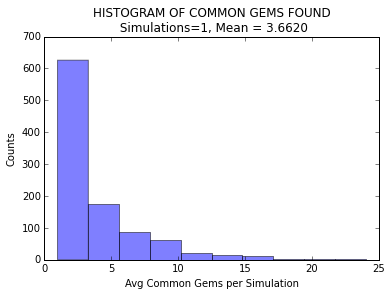

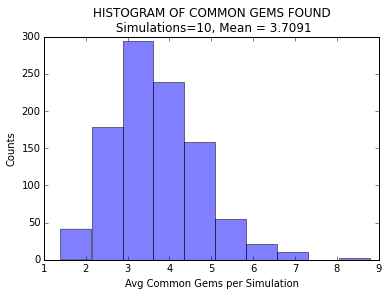

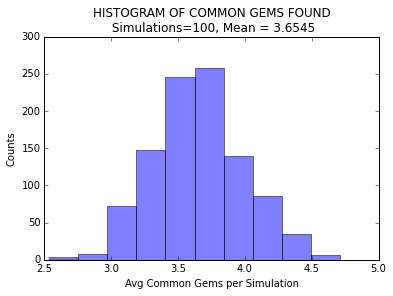

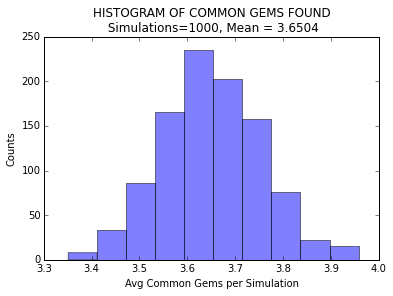

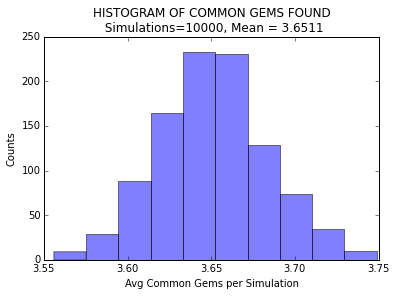

In [230]:
#List of iterations to show
iteration_attempts = (1,10,100,1000,10000)

for n in iteration_attempts:
    means = [] #Clear array of means for each set of iterations

    #Run 1,000 examples of n simulations
    for j in range(0,1000):
        z = gem_finder(n)
        means.append(np.mean(z[:,2])) #Store the mean of each simulation in the array

    #Plot a histogram of the means
    plt.hist(means,10, normed=0, facecolor='blue', alpha=0.5)
    plt.xlabel('Avg Common Gems per Simulation')
    plt.ylabel('Counts')
    plt.title('HISTOGRAM OF COMMON GEMS FOUND \n Simulations=%i, Mean = %.4f'%(n,np.mean(means)))

    plt.show()

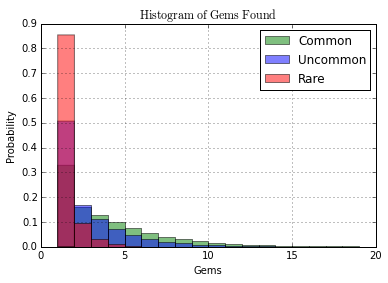

In [235]:
bins = range(1,20)
plt.hist(counter[:,2], bins, normed=1, facecolor='green', alpha=0.5)
plt.hist(counter[:,1], bins, normed=1, facecolor='blue', alpha=0.5)
plt.hist(counter[:,0], bins, normed=1, facecolor='red', alpha=0.5)

plt.xlabel('Gems')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Gems\ Found}$')
plt.legend(("Common","Uncommon","Rare"))
plt.grid(True)

plt.show()